In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import math
import time
from itertools import product

from shapely.geometry import Polygon, box
from ultralytics import YOLO
from glob import glob
from sklearn.cluster import DBSCAN

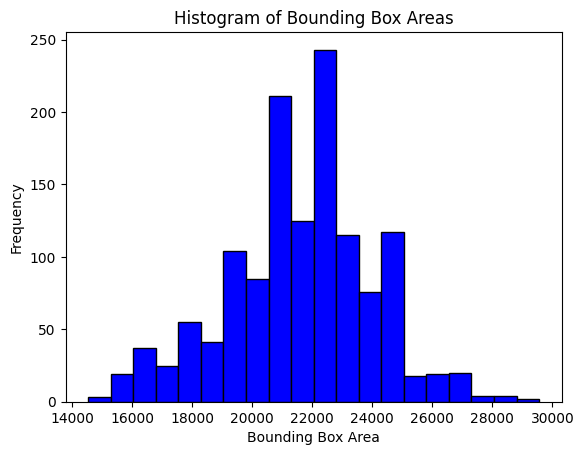

In [26]:
import matplotlib.pyplot as plt
from ultralytics import YOLO

# 모델 로드
image_dir = glob(r'C:\Users\ghkdr\Desktop\성현폴더\충북대\논문\데이터\크기편차검증용\data\대\*.jpg')
model_dir = r'C:\Users\ghkdr\Desktop\성현폴더\충북대\논문\실험\runs\yolov9c_aug\train2\weights\best.pt'

save_dir = f"result/output{len(glob('result/*'))}"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# 이미지 예측
model = YOLO(model_dir)
roi = box(5, 5, 950,955)
areas = []

for image_path in image_dir:
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2RGB)
    image_to_save = image.copy()
    cv2.rectangle(image_to_save, (5, 5), (950, 955), (255, 255, 255), 3)
    
    results = model(image, conf=0.6, iou=0.6, verbose=False, save=False)

    for result in results:
        for i, (x, y, w, h) in enumerate(result.boxes.xywh.cpu().numpy()):
            # 좌표를 정수로 변환
            x, y, w, h = map(int, [x, y, w, h])
            bbox = box(x - w / 2, y - h / 2, x + w / 2, y + h / 2)

            if roi.contains(bbox):
    
                # 가로세로 비율 계산
                aspect_ratio_max = max(w / h, h / w)
                   
                # 비율에 따라 이미지를 리스트에 추가
                if  1.0 <=aspect_ratio_max <= 1.2:
                    # area = w * h
                    # areas.append(area)
                
                    # xywh를 xyxy로 변환
                    x1, y1 = x - w // 2, y - h // 2
                    x2, y2 = x1 + w, y1 + h

                    resize_factor = int(min((x2 - x1) , (y2 - y1)))
                    # scale_factor = int(max((x2 - x1) , (y2 - y1))) / resize_factor
                      
                    # 이미지 크롭
                    cropped_image = image_rgb[y1:y2, x1:x2].copy()
                    # cropped_image = cv2.resize(cropped_image, (resize_factor, resize_factor))
            
                    # 가우시안 블러 적용
                    blurred_image = cv2.GaussianBlur(cropped_image, (11, 11), 0)
                
                    # 히스토그램 평탄화 적용
                    cropped_image_gray = cv2.cvtColor(blurred_image, cv2.COLOR_RGB2GRAY)
                    equalized_image = cv2.equalizeHist(cropped_image_gray)
                    
                    # 엣지 검출
                    edges = cv2.Canny(equalized_image, 50, 150)
        
                    # 허프 서클 탐지
                    circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30, param1=190, param2=40, minRadius=20, maxRadius=500)
        
                    # 원이 검출되었을 때
                    if circles is not None:
                        circles = np.round(circles[0, :]).astype('int')
                        # bbox_area = w * h
                        # bbox_radius = int(min((x2 - x1) , (y2 - y1)))
                        bbox_area = np.pi * ((resize_factor / 2) ** 2)
                        closest_circle = min(circles, key=lambda c: abs(np.pi * (c[2] ** 2) - bbox_area))
                        circle_x, circle_y, radius = closest_circle

                                # 반지름 보정
                        # if resize_factor == w:|
                        #     scale_factor = h / resize_factor
                        # else:
                        #     scale_factor = w / resize_factor
                        # radius = int(radius * scale_factor)
                        
                        cv2.circle(image_to_save, (x, y), radius, (0, 255, 0), 2)
                        cv2.circle(image_to_save, (x, y), 3, (0, 0, 255), -1)

                        area = np.pi * (radius ** 2)
                        areas.append(area)
                        file_name = image_path.split('\\')[-1]
                        cv2.imwrite(f"{save_dir}/result_{file_name}", image_to_save)
        
                        # # 원의 지름이 width의 80% 이상인지 검사
                        # if radius * 2 >= 0.8 * w:
                        #     # 원의 중심점과 bbox의 중심점 간의 거리 계산
                        #     distance = np.sqrt((circle_x - x) ** 2 + (circle_y - y) ** 2)
        
                        #     # 거리 조건이 30 미만일 때 면적 추가
                        # if distance < 100:
                            

# 히스토그램 출력
plt.hist(areas, bins=20, color='blue', edgecolor='black')
plt.xlabel('Bounding Box Area')
plt.ylabel('Frequency')
plt.title('Histogram of Bounding Box Areas')
plt.show()

In [27]:
print(np.mean(areas))
print(np.std(areas))
print(np.max(areas))
print(np.min(areas))

21586.296302801657
2399.790003094215
29559.245277626364
14526.724430199203


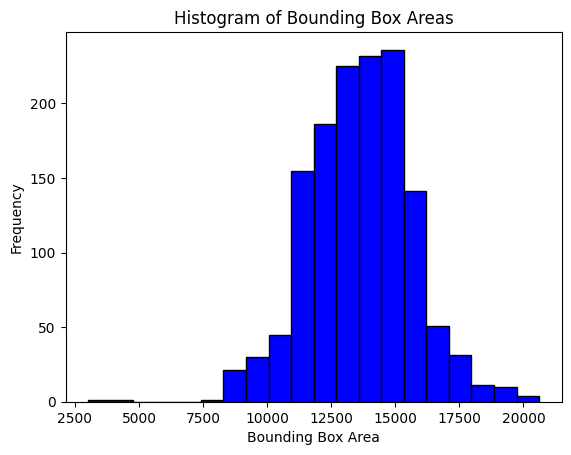

In [28]:
import matplotlib.pyplot as plt
from ultralytics import YOLO

# 모델 로드
image_dir = glob(r'C:\Users\ghkdr\Desktop\성현폴더\충북대\논문\데이터\크기편차검증용\data\중\*.jpg')
model_dir = r'C:\Users\ghkdr\Desktop\성현폴더\충북대\논문\실험\runs\yolov9c_aug\train2\weights\best.pt'

save_dir = f"result/output{len(glob('result/*'))}"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# 이미지 예측
model = YOLO(model_dir)
roi = box(5, 5, 950,955)
areas = []

for image_path in image_dir:
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2RGB)
    image_to_save = image.copy()
    cv2.rectangle(image_to_save, (5, 5), (950, 955), (255, 255, 255), 3)
    
    results = model(image, conf=0.6, iou=0.6, verbose=False, save=False)

    for result in results:
        for i, (x, y, w, h) in enumerate(result.boxes.xywh.cpu().numpy()):
            # 좌표를 정수로 변환
            x, y, w, h = map(int, [x, y, w, h])
            bbox = box(x - w / 2, y - h / 2, x + w / 2, y + h / 2)

            if roi.contains(bbox):
    
                # 가로세로 비율 계산
                aspect_ratio_max = max(w / h, h / w)
                   
                # 비율에 따라 이미지를 리스트에 추가
                if  1.0 <=aspect_ratio_max <= 1.2:
                    # area = w * h
                    # areas.append(area)
                
                    # xywh를 xyxy로 변환
                    x1, y1 = x - w // 2, y - h // 2
                    x2, y2 = x1 + w, y1 + h

                    resize_factor = int(min((x2 - x1) , (y2 - y1)))
                    # scale_factor = int(max((x2 - x1) , (y2 - y1))) / resize_factor
                      
                    # 이미지 크롭
                    cropped_image = image_rgb[y1:y2, x1:x2].copy()
                    # cropped_image = cv2.resize(cropped_image, (resize_factor, resize_factor))
            
                    # 가우시안 블러 적용
                    blurred_image = cv2.GaussianBlur(cropped_image, (11, 11), 0)
                
                    # 히스토그램 평탄화 적용
                    cropped_image_gray = cv2.cvtColor(blurred_image, cv2.COLOR_RGB2GRAY)
                    equalized_image = cv2.equalizeHist(cropped_image_gray)
                    
                    # 엣지 검출
                    edges = cv2.Canny(equalized_image, 50, 150)
        
                    # 허프 서클 탐지
                    circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30, param1=190, param2=40, minRadius=20, maxRadius=500)
        
                    # 원이 검출되었을 때
                    if circles is not None:
                        circles = np.round(circles[0, :]).astype('int')
                        # bbox_area = w * h
                        # bbox_radius = int(min((x2 - x1) , (y2 - y1)))
                        bbox_area = np.pi * ((resize_factor / 2) ** 2)
                        closest_circle = min(circles, key=lambda c: abs(np.pi * (c[2] ** 2) - bbox_area))
                        circle_x, circle_y, radius = closest_circle

                                # 반지름 보정
                        # if resize_factor == w:|
                        #     scale_factor = h / resize_factor
                        # else:
                        #     scale_factor = w / resize_factor
                        # radius = int(radius * scale_factor)
                        
                        cv2.circle(image_to_save, (x, y), radius, (0, 255, 0), 2)
                        cv2.circle(image_to_save, (x, y), 3, (0, 0, 255), -1)

                        area = np.pi * (radius ** 2)
                        areas.append(area)
                        file_name = image_path.split('\\')[-1]
                        cv2.imwrite(f"{save_dir}/result_{file_name}", image_to_save)
        
                        # # 원의 지름이 width의 80% 이상인지 검사
                        # if radius * 2 >= 0.8 * w:
                        #     # 원의 중심점과 bbox의 중심점 간의 거리 계산
                        #     distance = np.sqrt((circle_x - x) ** 2 + (circle_y - y) ** 2)
        
                        #     # 거리 조건이 30 미만일 때 면적 추가
                        # if distance < 100:
                            

# 히스토그램 출력
plt.hist(areas, bins=20, color='blue', edgecolor='black')
plt.xlabel('Bounding Box Area')
plt.ylabel('Frequency')
plt.title('Histogram of Bounding Box Areas')
plt.show()

In [29]:
print(np.mean(areas))
print(np.std(areas))
print(np.max(areas))
print(np.min(areas))

13544.493316510767
1960.232402945475
20611.989400202634
3019.0705400997913


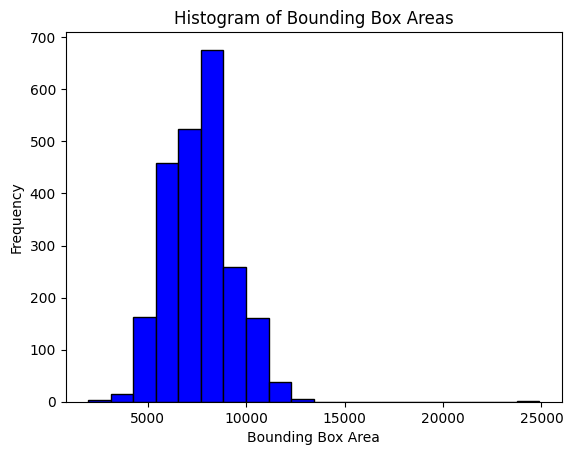

In [30]:
import matplotlib.pyplot as plt
from ultralytics import YOLO

# 모델 로드
image_dir = glob(r'C:\Users\ghkdr\Desktop\성현폴더\충북대\논문\데이터\크기편차검증용\data\소\*.jpg')
model_dir = r'C:\Users\ghkdr\Desktop\성현폴더\충북대\논문\실험\runs\yolov9c_aug\train2\weights\best.pt'

save_dir = f"result/output{len(glob('result/*'))}"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# 이미지 예측
model = YOLO(model_dir)
roi = box(5, 5, 950,955)
areas = []

for image_path in image_dir:
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2RGB)
    image_to_save = image.copy()
    cv2.rectangle(image_to_save, (5, 5), (950, 955), (255, 255, 255), 3)
    
    results = model(image, conf=0.6, iou=0.6, verbose=False, save=False)

    for result in results:
        for i, (x, y, w, h) in enumerate(result.boxes.xywh.cpu().numpy()):
            # 좌표를 정수로 변환
            x, y, w, h = map(int, [x, y, w, h])
            bbox = box(x - w / 2, y - h / 2, x + w / 2, y + h / 2)

            if roi.contains(bbox):
    
                # 가로세로 비율 계산
                aspect_ratio_max = max(w / h, h / w)
                   
                # 비율에 따라 이미지를 리스트에 추가
                if  1.0 <=aspect_ratio_max <= 1.2:
                    # area = w * h
                    # areas.append(area)
                
                    # xywh를 xyxy로 변환
                    x1, y1 = x - w // 2, y - h // 2
                    x2, y2 = x1 + w, y1 + h

                    resize_factor = int(min((x2 - x1) , (y2 - y1)))
                    # scale_factor = int(max((x2 - x1) , (y2 - y1))) / resize_factor
                      
                    # 이미지 크롭
                    cropped_image = image_rgb[y1:y2, x1:x2].copy()
                    # cropped_image = cv2.resize(cropped_image, (resize_factor, resize_factor))
            
                    # 가우시안 블러 적용
                    blurred_image = cv2.GaussianBlur(cropped_image, (11, 11), 0)
                
                    # 히스토그램 평탄화 적용
                    cropped_image_gray = cv2.cvtColor(blurred_image, cv2.COLOR_RGB2GRAY)
                    equalized_image = cv2.equalizeHist(cropped_image_gray)
                    
                    # 엣지 검출
                    edges = cv2.Canny(equalized_image, 50, 150)
        
                    # 허프 서클 탐지
                    circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30, param1=190, param2=40, minRadius=20, maxRadius=500)
        
                    # 원이 검출되었을 때
                    if circles is not None:
                        circles = np.round(circles[0, :]).astype('int')
                        # bbox_area = w * h
                        # bbox_radius = int(min((x2 - x1) , (y2 - y1)))
                        bbox_area = np.pi * ((resize_factor / 2) ** 2)
                        closest_circle = min(circles, key=lambda c: abs(np.pi * (c[2] ** 2) - bbox_area))
                        circle_x, circle_y, radius = closest_circle

                                # 반지름 보정
                        # if resize_factor == w:|
                        #     scale_factor = h / resize_factor
                        # else:
                        #     scale_factor = w / resize_factor
                        # radius = int(radius * scale_factor)
                        
                        cv2.circle(image_to_save, (x, y), radius, (0, 255, 0), 2)
                        cv2.circle(image_to_save, (x, y), 3, (0, 0, 255), -1)

                        area = np.pi * (radius ** 2)
                        areas.append(area)
                        file_name = image_path.split('\\')[-1]
                        cv2.imwrite(f"{save_dir}/result_{file_name}", image_to_save)
        
                        # # 원의 지름이 width의 80% 이상인지 검사
                        # if radius * 2 >= 0.8 * w:
                        #     # 원의 중심점과 bbox의 중심점 간의 거리 계산
                        #     distance = np.sqrt((circle_x - x) ** 2 + (circle_y - y) ** 2)
        
                        #     # 거리 조건이 30 미만일 때 면적 추가
                        # if distance < 100:
                            

# 히스토그램 출력
plt.hist(areas, bins=20, color='blue', edgecolor='black')
plt.xlabel('Bounding Box Area')
plt.ylabel('Frequency')
plt.title('Histogram of Bounding Box Areas')
plt.show()

In [31]:
print(np.mean(areas))
print(np.std(areas))
print(np.max(areas))
print(np.min(areas))

7657.691432803989
1689.916360938492
24884.55540908475
1963.4954084936207


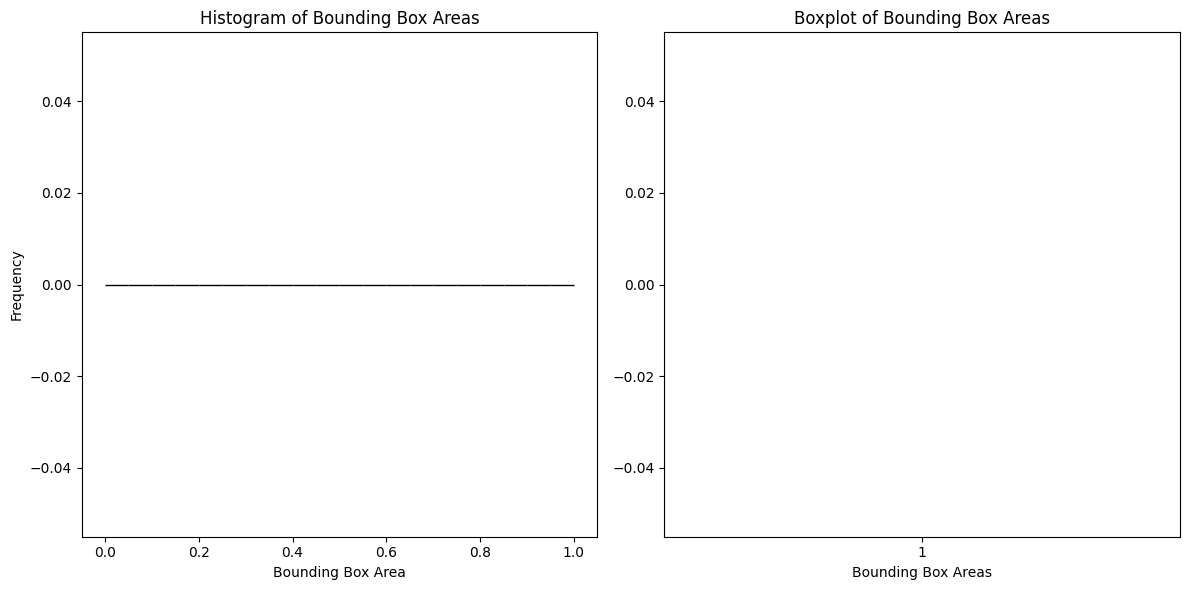

In [32]:
import matplotlib.pyplot as plt
from ultralytics import YOLO

# 모델 로드
image_dir = glob(r'C:\Users\ghkdr\Desktop\성현폴더\충북대\논문\데이터\CH03_data2\image_origin\*.jpg')
model_dir = r'C:\Users\ghkdr\Desktop\성현폴더\충북대\논문\실험\runs\yolov9c_aug\train2\weights\best.pt'

save_dir = f"result/output{len(glob('result/*'))}"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# 이미지 예측
model = YOLO(model_dir)
roi = box(5, 5, 950,955)
areas = []
color_list = [(255, 0, 0,), (0, 255, 0), (0, 0, 255)]

for image_path in image_dir:
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2RGB)
    image_to_save = image.copy()
    cv2.rectangle(image_to_save, (5, 5), (950, 955), (255, 255, 255), 3)
    
    results = model(image, conf=0.8, iou=0.6, verbose=False, save=False)

    for result in results:
        area_list = []
        bbox_list = []
        for i, detection in enumerate(result.boxes.xywh.cpu().numpy()):
            # 좌표를 정수로 변환
            x, y, w, h = detection
            # x, y, w, h = map(int, [x, y, w, h])
            bbox = box(x - w / 2, y - h / 2, x + w / 2, y + h / 2)

            if roi.contains(bbox):
    
                # 가로세로 비율 계산
                aspect_ratio_max = max(w / h, h / w)
                   
                # 비율에 따라 이미지를 리스트에 추가
                if  1.0 <= aspect_ratio_max <= 1.2:
                    # area = w * h
                    # areas.append(area)
                
                    # xywh를 xyxy로 변환
                    x1, y1 = int(x - w // 2), int(y - h // 2)
                    x2, y2 = int(x1 + w), int(y1 + h)

                    # resize_factor = int(min((x2 - x1) , (y2 - y1)))
                    # scale_factor = int(max((x2 - x1) , (y2 - y1))) / resize_factor
                      
                    # 이미지 크롭
                    cropped_image = image_rgb[y1:y2, x1:x2].copy()
                    # cropped_image = cv2.resize(cropped_image, (resize_factor, resize_factor))
            
                    # 가우시안 블러 적용
                    blurred_image = cv2.GaussianBlur(cropped_image, (11, 11), 0)
                
                    # 히스토그램 평탄화 적용
                    cropped_image_gray = cv2.cvtColor(blurred_image, cv2.COLOR_RGB2GRAY)
                    equalized_image = cv2.equalizeHist(cropped_image_gray)
                    
                    # 엣지 검출
                    edges = cv2.Canny(equalized_image, 50, 150)
        
                    # 허프 서클 탐지
                    circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30, param1=190, param2=40, minRadius=20, maxRadius=500)
        
                    # 원이 검출되었을 때
                    if circles is not None:
                        area = w * h
                        area_list.append(area)
                        bbox_list.append((detection))

                    # DBSCAN 클러스터링 적용
    if len(area_list) != 0:
        area_array = np.array(area_list).reshape(-1, 1)
        eps = int(np.mean(area_list) * 0.25)
        dbscan = DBSCAN(eps=eps, min_samples=1).fit(area_array)
        
        dbscan.labels_

        for label, bbox, area in zip(dbscan.labels_, bbox_list, area_list):
            x, y, w, h = bbox
            x1 = int(x - w / 2)
            y1 = int(y - h / 2)
            x2 = int(x + w / 2)
            y2 = int(y + h / 2)
            cv2.rectangle(image_to_save, (x1, y1), (x2, y2), color_list[label], 2)
        
            text = str(int(area))  # 여기에 표시할 텍스트
            font = cv2.FONT_HERSHEY_SIMPLEX
            font_scale = 1.5
            font_color = (255, 0, 255) 
            thickness = 2
            text_position = (x2 - 20, y1 - 10) 
        
            # 텍스트를 이미지에 추가
            cv2.putText(image_to_save, text, text_position, font, font_scale, font_color, thickness)

            if len(np.unique(dbscan.labels_)) > 1:
    
                file_name = image_path.split('\\')[-1]
                # save_histogram(area_list, save_path=f"{save_dir}/result_hist_{file_name}")
                cv2.imwrite(f"{save_dir}/result_{file_name}", image_to_save)

                        # # 원의 지름이 width의 80% 이상인지 검사
                        # if radius * 2 >= 0.8 * w:
                        #     # 원의 중심점과 bbox의 중심점 간의 거리 계산
                        #     distance = np.sqrt((circle_x - x) ** 2 + (circle_y - y) ** 2)
        
                        #     # 거리 조건이 30 미만일 때 면적 추가
                        # if distance < 100:
                            

# 히스토그램과 박스플롯 출력
plt.figure(figsize=(12, 6))

# 왼쪽: 히스토그램
plt.subplot(1, 2, 1)
plt.hist(areas, bins=20, color='blue', edgecolor='black')
plt.xlabel('Bounding Box Area')
plt.ylabel('Frequency')
plt.title('Histogram of Bounding Box Areas')

# 오른쪽: 박스플롯
plt.subplot(1, 2, 2)
plt.boxplot(areas, patch_artist=True)
plt.xlabel('Bounding Box Areas')
plt.title('Boxplot of Bounding Box Areas')

# 그래프 출력
plt.tight_layout()
plt.show()

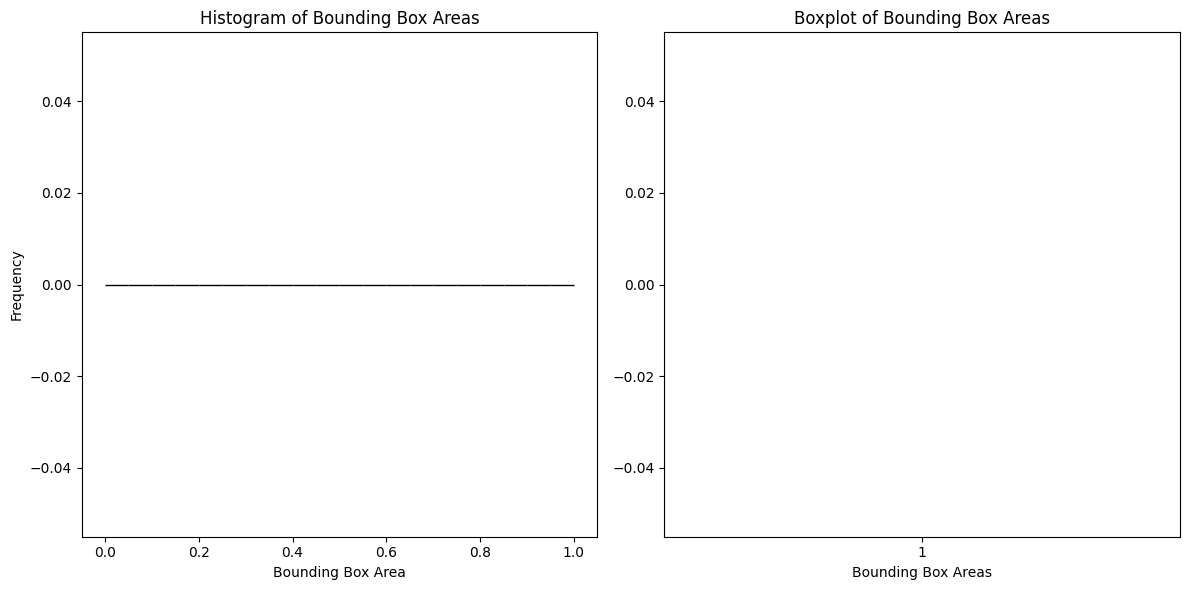

In [33]:
import matplotlib.pyplot as plt
from ultralytics import YOLO

# 모델 로드
image_dir = glob(r'C:\Users\ghkdr\Desktop\성현폴더\충북대\논문\데이터\CH03_data2\image_origin\*.jpg')
model_dir = r'C:\Users\ghkdr\Desktop\성현폴더\충북대\논문\실험\runs\yolov9c_aug\train2\weights\best.pt'

save_dir = f"result/output{len(glob('result/*'))}"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# 이미지 예측
model = YOLO(model_dir)
roi = box(5, 5, 950,955)
areas = []
color_list = [(255, 0, 0,), (0, 255, 0), (0, 0, 255)]

for image_path in image_dir:
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2RGB)
    image_to_save = image.copy()
    cv2.rectangle(image_to_save, (5, 5), (950, 955), (255, 255, 255), 3)
    
    results = model(image, conf=0.8, iou=0.6, verbose=False, save=False)

    for result in results:
        area_list = []
        bbox_list = []
        for i, detection in enumerate(result.boxes.xywh.cpu().numpy()):
            # 좌표를 정수로 변환
            x, y, w, h = detection
            # x, y, w, h = map(int, [x, y, w, h])
            bbox = box(x - w / 2, y - h / 2, x + w / 2, y + h / 2)

            if roi.contains(bbox):
    
                # 가로세로 비율 계산
                aspect_ratio_max = max(w / h, h / w)
                   
                # 비율에 따라 이미지를 리스트에 추가
                if  1.0 <= aspect_ratio_max <= 1.2:
                    area = w * h
                    area_list.append(area)
                    bbox_list.append((detection))
                
                    # xywh를 xyxy로 변환
                    # x1, y1 = int(x - w // 2), int(y - h // 2)
                    # x2, y2 = int(x1 + w), int(y1 + h)

                    # # resize_factor = int(min((x2 - x1) , (y2 - y1)))
                    # # scale_factor = int(max((x2 - x1) , (y2 - y1))) / resize_factor
                      
                    # # 이미지 크롭
                    # cropped_image = image_rgb[y1:y2, x1:x2].copy()
                    # # cropped_image = cv2.resize(cropped_image, (resize_factor, resize_factor))
            
                    # # 가우시안 블러 적용
                    # blurred_image = cv2.GaussianBlur(cropped_image, (11, 11), 0)
                
                    # # 히스토그램 평탄화 적용
                    # cropped_image_gray = cv2.cvtColor(blurred_image, cv2.COLOR_RGB2GRAY)
                    # equalized_image = cv2.equalizeHist(cropped_image_gray)
                    
                    # # 엣지 검출
                    # edges = cv2.Canny(equalized_image, 50, 150)
        
                    # # 허프 서클 탐지
                    # circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30, param1=190, param2=40, minRadius=20, maxRadius=500)
        
                    # # 원이 검출되었을 때
                    # if circles is not None:
                    #     area = w * h
                    #     area_list.append(area)
                    #     bbox_list.append((detection))

                    # DBSCAN 클러스터링 적용
    if len(area_list) != 0:
        area_array = np.array(area_list).reshape(-1, 1)
        eps = int(np.mean(area_list) * 0.25)
        dbscan = DBSCAN(eps=eps, min_samples=1).fit(area_array)
        
        dbscan.labels_

        for label, bbox, area in zip(dbscan.labels_, bbox_list, area_list):
            x, y, w, h = bbox
            x1 = int(x - w / 2)
            y1 = int(y - h / 2)
            x2 = int(x + w / 2)
            y2 = int(y + h / 2)
            cv2.rectangle(image_to_save, (x1, y1), (x2, y2), color_list[label], 2)
        
            text = str(int(area))  # 여기에 표시할 텍스트
            font = cv2.FONT_HERSHEY_SIMPLEX
            font_scale = 1.5
            font_color = (255, 0, 255) 
            thickness = 2
            text_position = (x2 - 20, y1 - 10) 
        
            # 텍스트를 이미지에 추가
            cv2.putText(image_to_save, text, text_position, font, font_scale, font_color, thickness)

            if len(np.unique(dbscan.labels_)) > 1:
    
                file_name = image_path.split('\\')[-1]
                # save_histogram(area_list, save_path=f"{save_dir}/result_hist_{file_name}")
                cv2.imwrite(f"{save_dir}/result_{file_name}", image_to_save)

                        # # 원의 지름이 width의 80% 이상인지 검사
                        # if radius * 2 >= 0.8 * w:
                        #     # 원의 중심점과 bbox의 중심점 간의 거리 계산
                        #     distance = np.sqrt((circle_x - x) ** 2 + (circle_y - y) ** 2)
        
                        #     # 거리 조건이 30 미만일 때 면적 추가
                        # if distance < 100:
                            

# 히스토그램과 박스플롯 출력
plt.figure(figsize=(12, 6))

# 왼쪽: 히스토그램
plt.subplot(1, 2, 1)
plt.hist(areas, bins=20, color='blue', edgecolor='black')
plt.xlabel('Bounding Box Area')
plt.ylabel('Frequency')
plt.title('Histogram of Bounding Box Areas')

# 오른쪽: 박스플롯
plt.subplot(1, 2, 2)
plt.boxplot(areas, patch_artist=True)
plt.xlabel('Bounding Box Areas')
plt.title('Boxplot of Bounding Box Areas')

# 그래프 출력
plt.tight_layout()
plt.show()